# Project brief
#### OurBank is an Australian retail bank that offers customers a range of products and services, including loans, credit cards, transaction and savings accounts. Recently they are facing customers attrition and customers keep moving to other banks and leaving OurBank in their dust.

#### We need to analyse the data to find out the reason behind this, predict future customers who might leave, and to determine whether or not there are strategies thats can applied to retain existing customers.

### Data Set  - Our Bank customer data For Python.csv

# Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This will allow to generate plots within the Jupyter notebook.
%matplotlib inline

#this adds some extra styling to the graphs we will make
sns.set_style("whitegrid")

# Reading the excel file and initial exploration**

In [2]:
df=pd.read_csv("Our Bank customer data For Python.csv")

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [4]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Unnamed: 21                 float64
dtype: object

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


# Delete column Unnamed: 21  as it is not needed for analysis

In [6]:
df.drop(columns='Unnamed: 21', inplace=True)

# Find duplicate customers if any

In [7]:
df_duplicated=df[df.duplicated(subset='CLIENTNUM',keep=False)]

**No duplicate customers found**

In [8]:
df_duplicated

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


# Check for NULLs

In [9]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

**There are no Nulls present in the data set**

# Check info of the dataframe to the get idea of datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Checking unique values of ['Attrition_Flag']

In [12]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

# Add new column ['Churned']  having values 1 for Attrited Customer 0 for Existing Customer

In [13]:
df['Churned'] = np.where(df['Attrition_Flag'] == 'Existing Customer', 0, 1)   #-- to avoid warning

In [16]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,1


# Correlation of 'Churned' or not with other variables



In [14]:
df.Churned = df.Churned.astype(int)
df.Churned

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Churned, Length: 10127, dtype: int32

<AxesSubplot:>

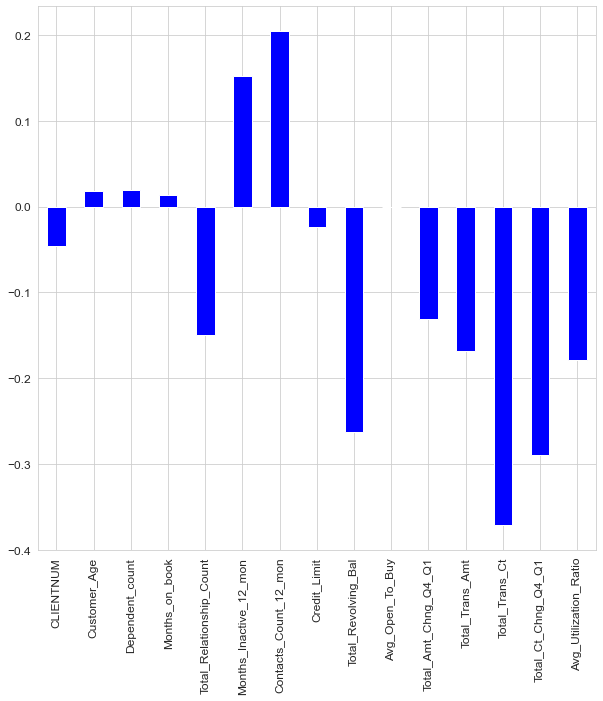

In [15]:
# Correlation with Churned or not 

correlations = df.loc[ : , df.columns != 'Churned'].corrwith(df.Churned)  # This will ensure CHurned column relation with every other column except Churned
correlations = correlations[correlations!=1]  # to filter out the same column co-relations
correlations.plot.bar(figsize = (10, 10),fontsize = 12,color = 'b',grid = True)



## Complete Correlation Matrix

In [17]:
# Complete Co relation Matrix of all variables

df.corr().style.background_gradient(cmap='Blues').set_precision(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned
CLIENTNUM,1.00,0.01,0.01,0.13,0.01,0.01,0.01,0.01,0.00,0.01,0.02,-0.02,-0.00,0.01,0.00,-0.05
Customer_Age,0.01,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01,0.02
Dependent_count,0.01,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04,0.02
Months_on_book,0.13,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01,0.01
Total_Relationship_Count,0.01,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07,-0.15
Months_Inactive_12_mon,0.01,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01,0.15
Contacts_Count_12_mon,0.01,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06,0.20
Credit_Limit,0.01,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48,-0.02
Total_Revolving_Bal,0.00,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62,-0.26
Avg_Open_To_Buy,0.01,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54,-0.00


# Logistic regression

In [18]:
# As column CLIENTNUM is just the unique identifier , this is not needed for our analysis. Hence slicing the dataframe


df2 = df.iloc[:,1:]

In [19]:
df2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churned
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


In [20]:
# To deal with remaining categorical variables. A Dummy Variable is a way of incorporating nominal variables into a regression as a binary value. 

dummy_df = pd.get_dummies(df2,drop_first=True)

In [21]:
dummy_df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churned', 'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [22]:
# Establish target feature, churn
y = dummy_df.Churned.values

In [23]:
# Drop the target feature from remaining features
X = dummy_df.drop('Churned', axis = 1)

In [24]:
# Save dataframe column titles to list, we will need them in next step

cols = X.columns

In [25]:
X.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [28]:
#Building the Model
from sklearn.linear_model import LogisticRegression

In [29]:
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept

logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver= 'liblinear')

In [30]:
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [31]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

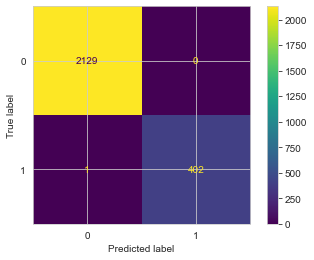

In [32]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, values_format = '');

In [33]:
#Calculating the score
logreg.score(X,y)

0.9999012540732695

In [34]:
#Getting Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2129
           1       1.00      1.00      1.00       403

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532



# Save the dataframe as CSV

In [ ]:
df.to_csv("Our Bank customer data Cleaned.csv", sep=',',index=False)

# Exploratory Data Analysis

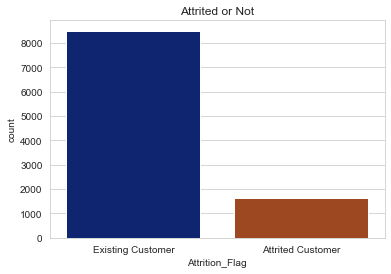

In [35]:
#Attrition Flag

fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df.Attrition_Flag,palette ='dark',ax=ax).set_title("Attrited or Not");

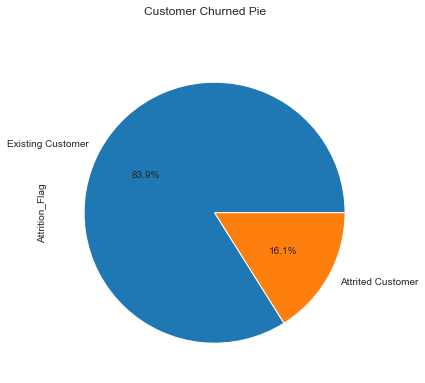

In [36]:
# Pie to find No of attrited customers
df['Attrition_Flag'].value_counts().plot.pie(subplots=True,figsize=(11,6),\
                                             y='Attrition_Flag',autopct="%.1f%%",title="Customer Churned Pie");

# Analysis of Numerical Variables

### Collecting our continuous variables in the "num_list" list.
### Create a function to create and analyse chart one by one
### Loop and call the function

In [ ]:
df.columns

In [42]:
num_list=['Customer_Age','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [38]:
df_churned=df[df['Churned']==1]
df_existing=df[df['Churned']==0]

In [39]:
def numeric_churned(variable):
    fig_dims = (10, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.hist(df_churned[variable], color = "b")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution :Churned".format(variable),fontsize=14)
    plt.show()

In [40]:
def numeric_existing(variable):
    fig_dims = (10, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.hist(df_existing[variable], color = "c")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution :Existing".format(variable),fontsize=14)
    plt.show()

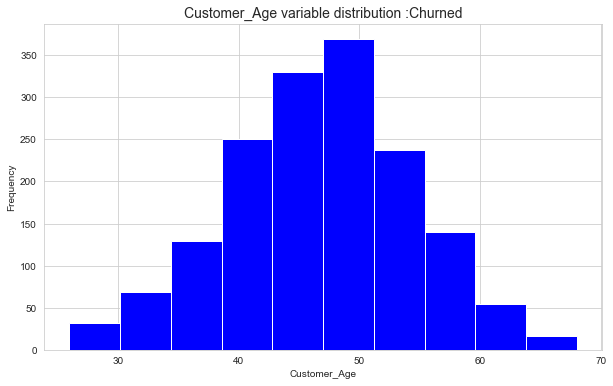

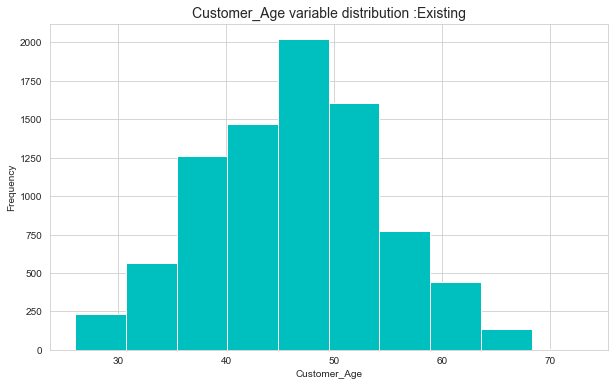

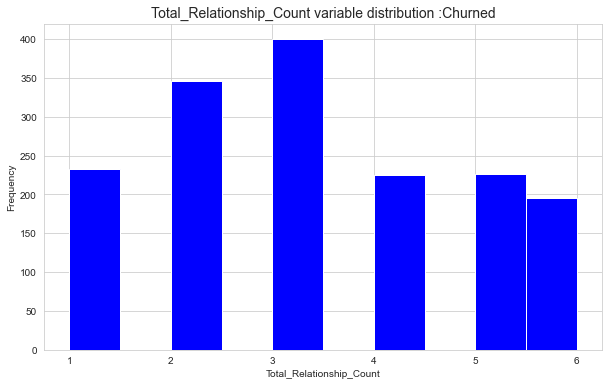

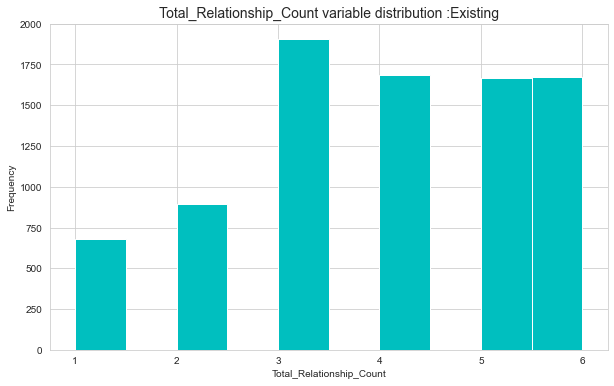

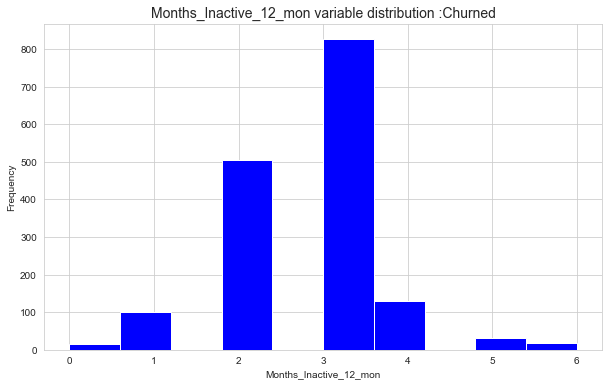

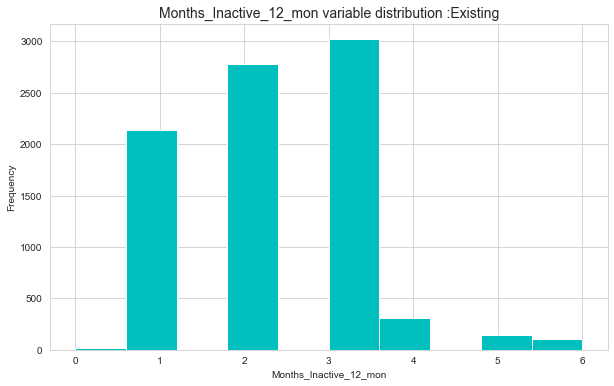

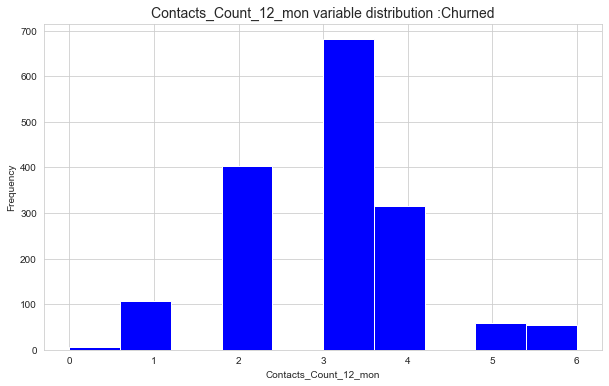

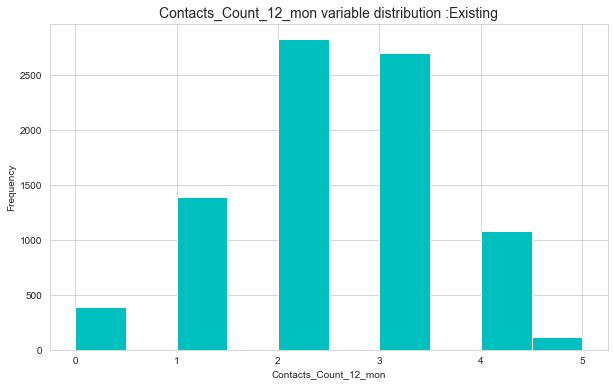

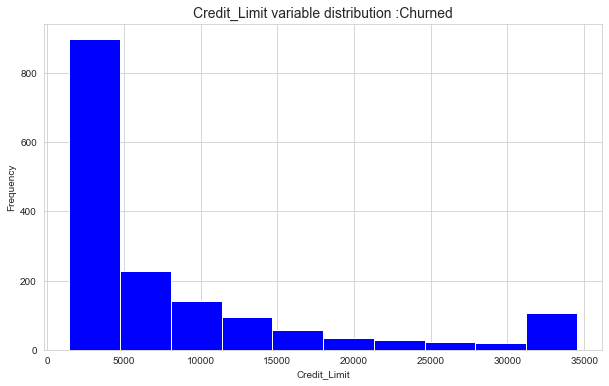

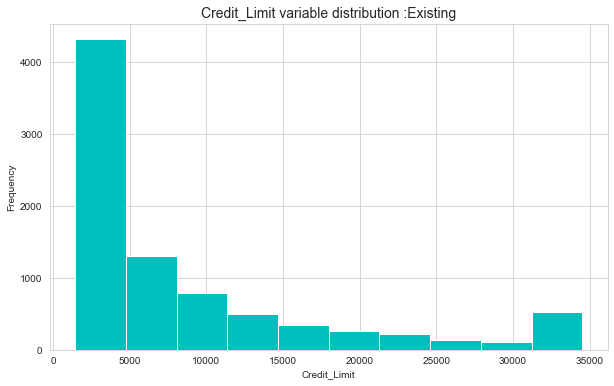

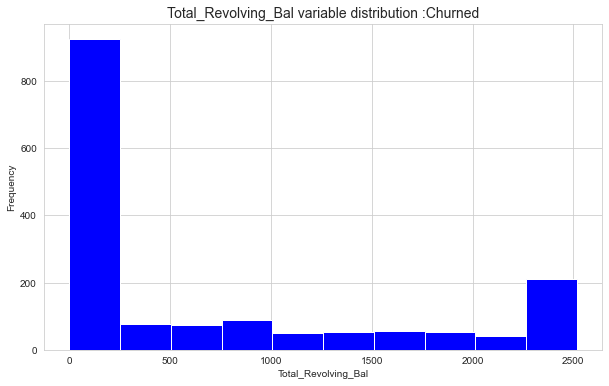

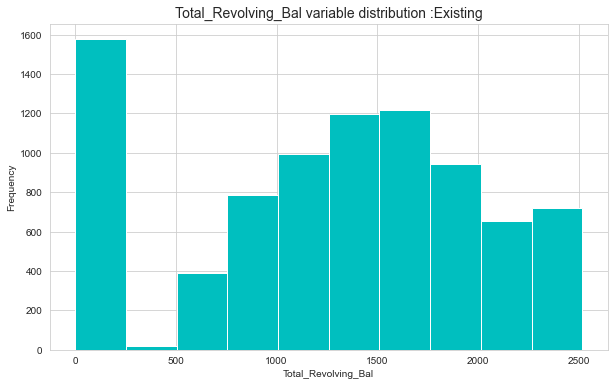

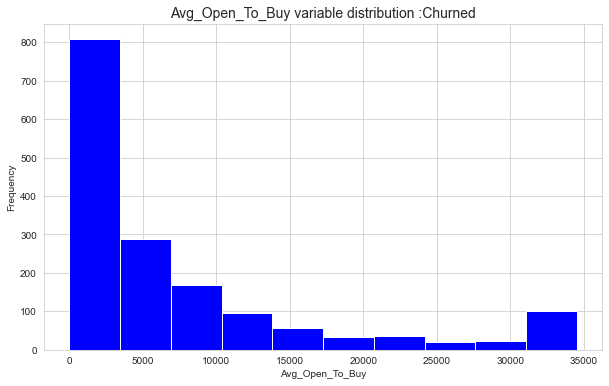

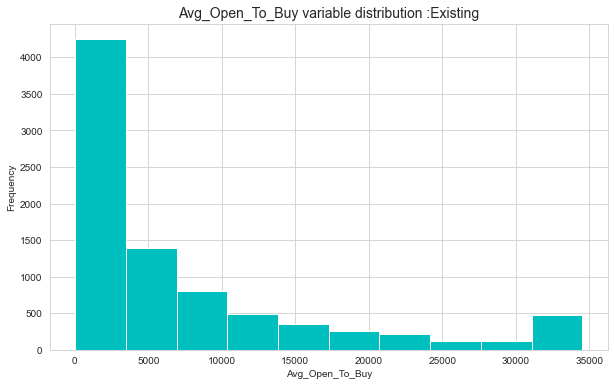

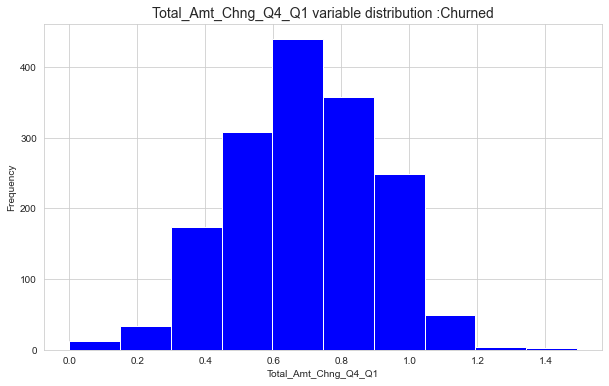

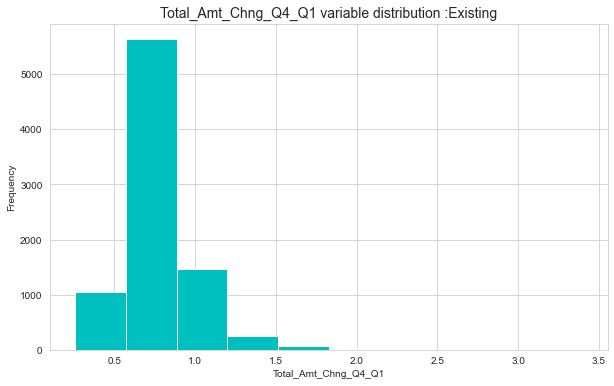

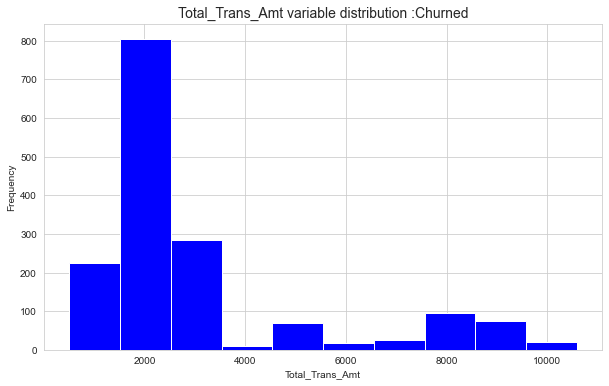

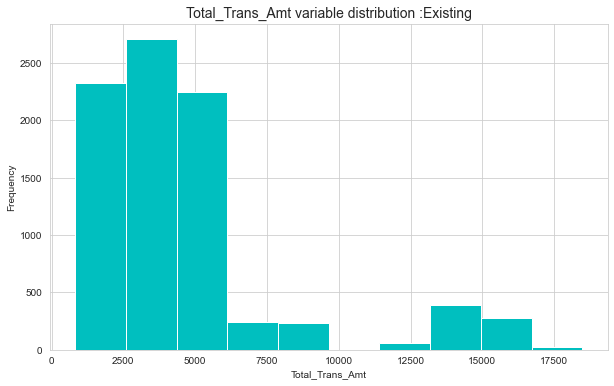

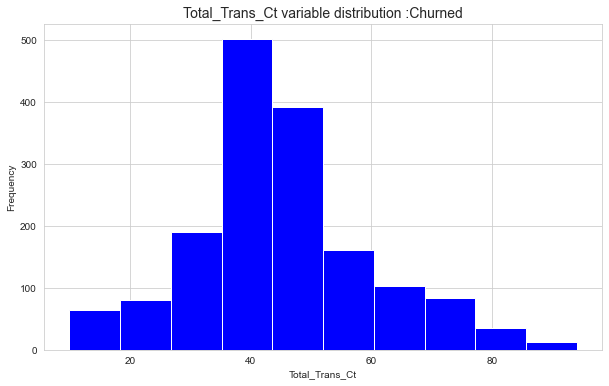

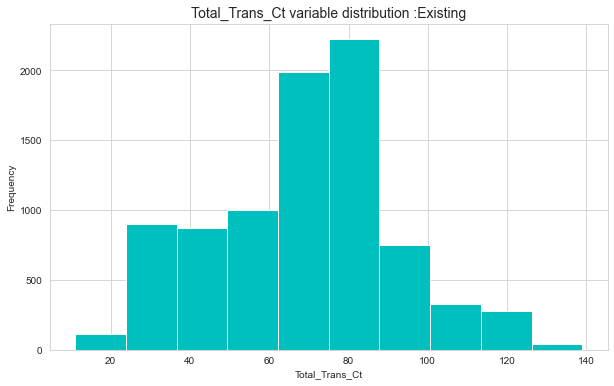

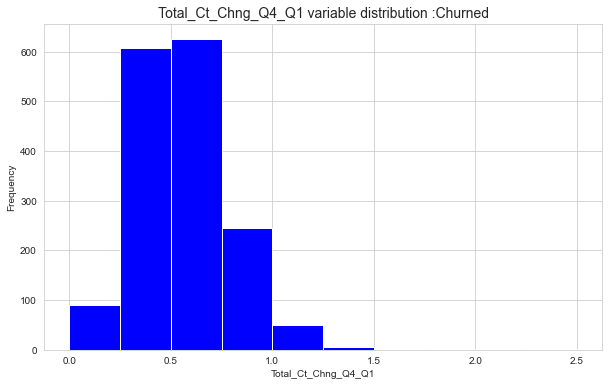

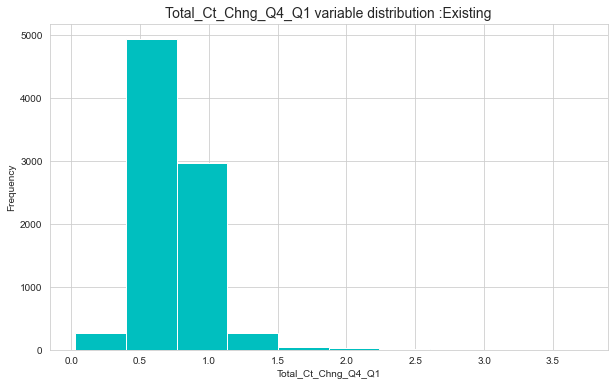

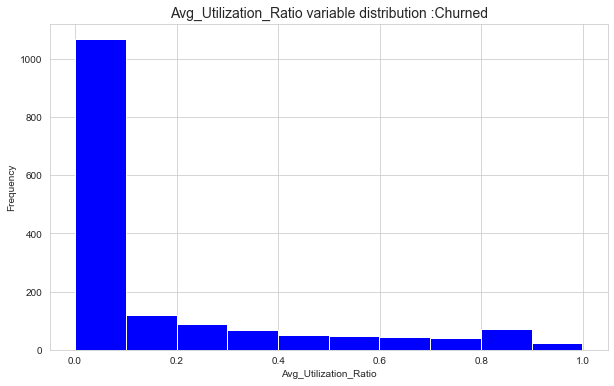

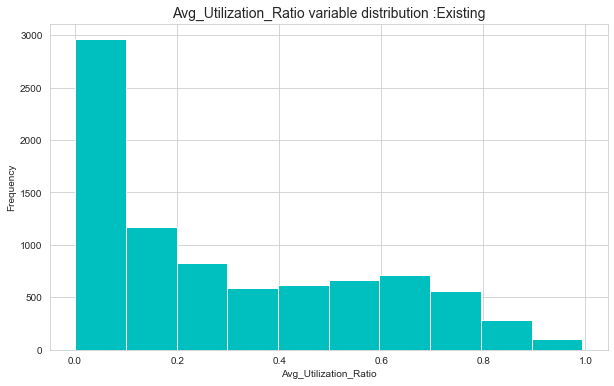

In [43]:
for i in num_list:
    numeric_churned(i)
    numeric_existing(i)

# Categorical Variables Analysis
### Gender Dependent_count Education_Level Marital_Status Income_Category Card_Category


In [44]:
cat_list=['Attrition_Flag', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

In [45]:
def cat_analysis(variable):
    fig_dims = (10, 4)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.countplot(x=df[variable],palette ='muted',orient='v',hue=df.Churned,ax=ax)\
    .set_title("{}".format(variable))
    print(df.groupby(variable)["Churned"].mean())

Attrition_Flag
Attrited Customer    1
Existing Customer    0
Name: Churned, dtype: int32
Gender
F    0.173572
M    0.146152
Name: Churned, dtype: float64
Dependent_count
0    0.149336
1    0.146355
2    0.157062
3    0.176428
4    0.165184
5    0.150943
Name: Churned, dtype: float64
Education_Level
College          0.152024
Doctorate        0.210643
Graduate         0.155691
High School      0.152012
Post-Graduate    0.178295
Uneducated       0.159381
Unknown          0.168532
Name: Churned, dtype: float64
Marital_Status
Divorced    0.161765
Married     0.151269
Single      0.169414
Unknown     0.172230
Name: Churned, dtype: float64
Income_Category
$120K +           0.173315
$40K - $60K       0.151397
$60K - $80K       0.134807
$80K - $120K      0.157655
Less than $40K    0.171862
Unknown           0.168165
Name: Churned, dtype: float64
Card_Category
Blue        0.160979
Gold        0.181034
Platinum    0.250000
Silver      0.147748
Name: Churned, dtype: float64


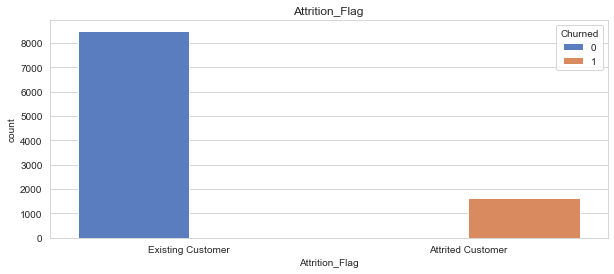

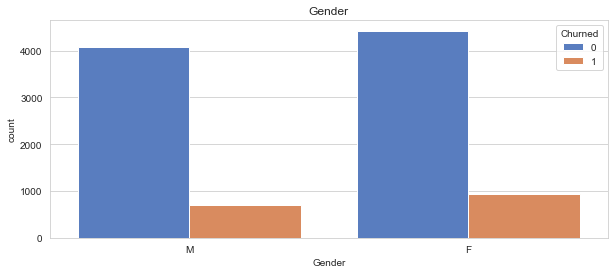

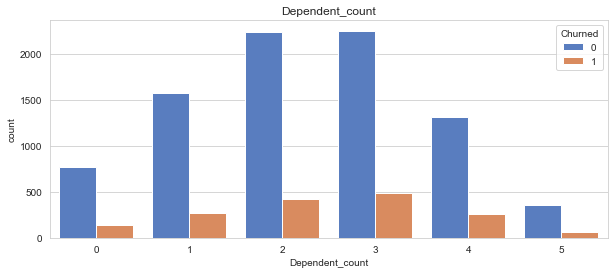

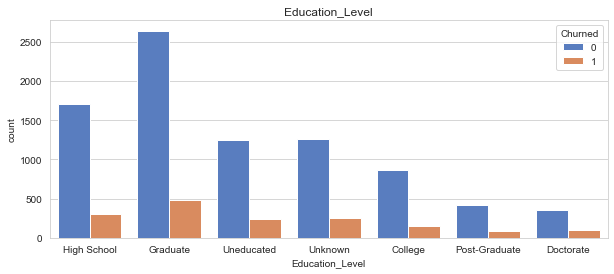

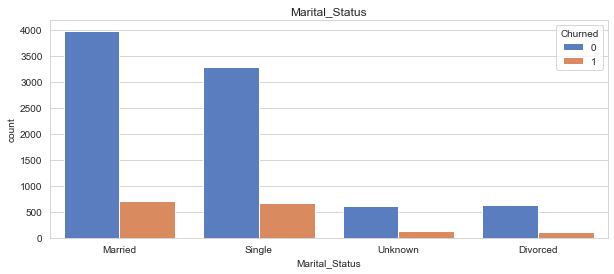

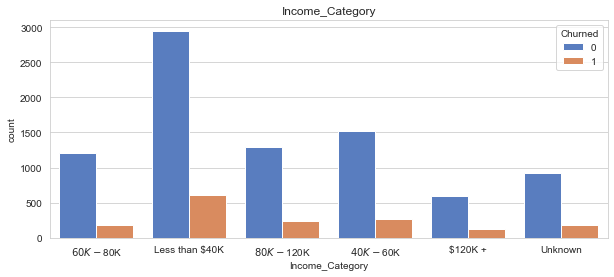

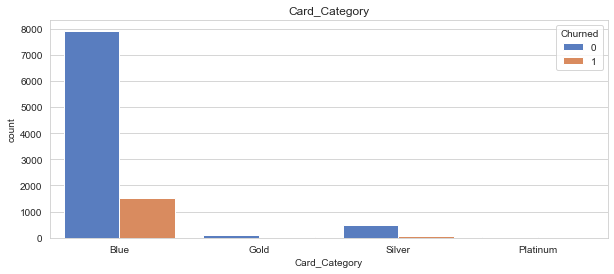

In [46]:
for i in cat_list:
    cat_analysis(i)

In [47]:
df.groupby(df["Churned"])["Total_Revolving_Bal"].mean()

Churned
0    1256.604118
1     672.822987
Name: Total_Revolving_Bal, dtype: float64

#### Average account Total_Revolving_Bal of existing customers   1256.604118 **
#### Average account Total_Revolving_Bal of attrited customers -  672.822987 **